<a href="https://colab.research.google.com/github/divyamjariwal/Deep-Learning-Lab/blob/main/DL_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons


In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))


In [3]:
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=2,
    random_state=42
)

y = y.reshape(-1, 1)


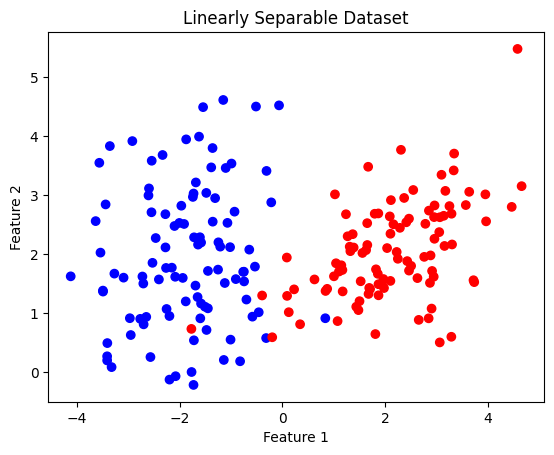

In [4]:
plt.scatter(X[:,0], X[:,1], c=y[:,0], cmap='bwr')
plt.title("Linearly Separable Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [5]:
# Initialize weights
W = np.random.randn(2, 1)
b = 0
lr = 0.1

# Training
for epoch in range(1000):
    z = np.dot(X, W) + b
    y_pred = sigmoid(z)

    error = y_pred - y
    dW = np.dot(X.T, error) / len(X)
    db = np.mean(error)

    W -= lr * dW
    b -= lr * db


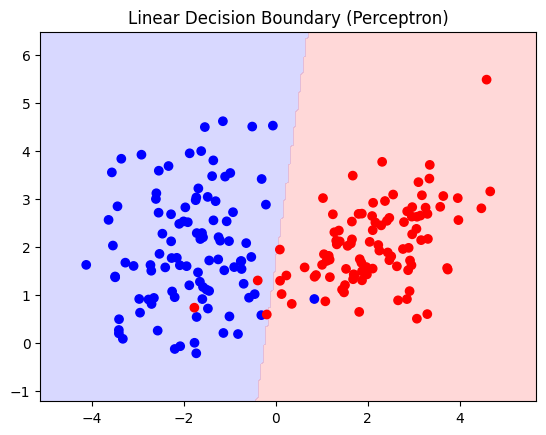

In [6]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = sigmoid(np.dot(grid, W) + b)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z > 0.5, alpha=0.3, cmap='bwr')
plt.scatter(X[:,0], X[:,1], c=y[:,0], cmap='bwr')
plt.title("Linear Decision Boundary (Perceptron)")
plt.show()


In [7]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
y = y.reshape(-1, 1)


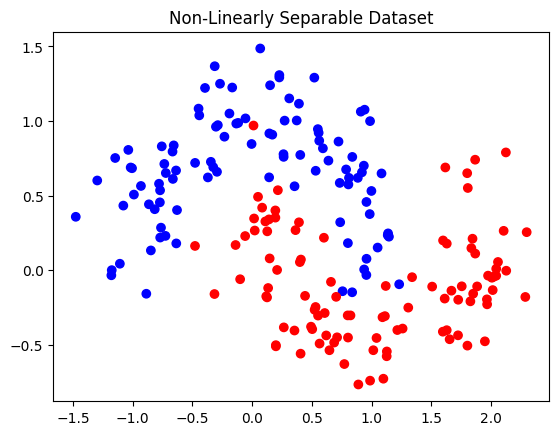

In [8]:
plt.scatter(X[:,0], X[:,1], c=y[:,0], cmap='bwr')
plt.title("Non-Linearly Separable Dataset")
plt.show()


In [9]:
W = np.random.randn(2, 1)
b = 0

for epoch in range(1000):
    z = np.dot(X, W) + b
    y_pred = sigmoid(z)

    error = y_pred - y
    W -= 0.1 * np.dot(X.T, error) / len(X)
    b -= 0.1 * np.mean(error)


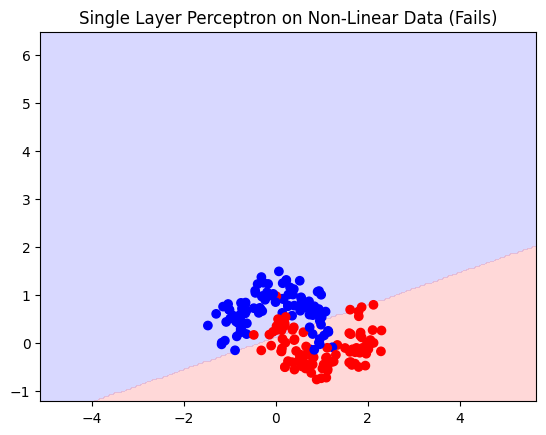

In [10]:
Z = sigmoid(np.dot(grid, W) + b)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z > 0.5, alpha=0.3, cmap='bwr')
plt.scatter(X[:,0], X[:,1], c=y[:,0], cmap='bwr')
plt.title("Single Layer Perceptron on Non-Linear Data (Fails)")
plt.show()


In [11]:
np.random.seed(42)

W1 = np.random.randn(2, 8)
b1 = np.zeros((1, 8))

W2 = np.random.randn(8, 1)
b2 = np.zeros((1, 1))

lr = 0.1


In [12]:
for epoch in range(5000):

    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = np.tanh(z1)

    z2 = np.dot(a1, W2) + b2
    y_pred = sigmoid(z2)

    # Backpropagation
    error = y_pred - y
    dW2 = np.dot(a1.T, error)
    db2 = np.sum(error)

    da1 = np.dot(error, W2.T)
    dz1 = da1 * (1 - np.tanh(z1)**2)

    dW1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0)

    # Update
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2


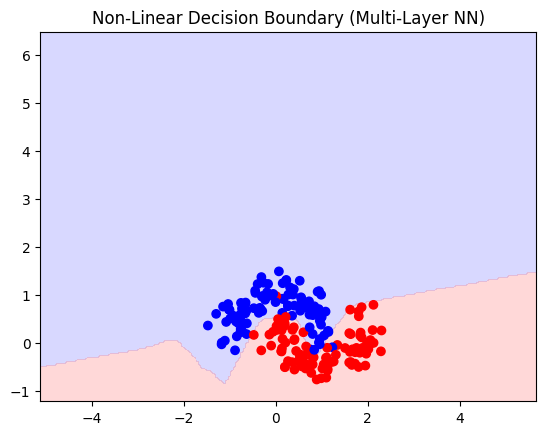

In [13]:
Z = []
for point in grid:
    a1 = np.tanh(np.dot(point, W1) + b1)
    z2 = sigmoid(np.dot(a1, W2) + b2)
    Z.append(z2)

Z = np.array(Z).reshape(xx.shape)

plt.contourf(xx, yy, Z > 0.5, alpha=0.3, cmap='bwr')
plt.scatter(X[:,0], X[:,1], c=y[:,0], cmap='bwr')
plt.title("Non-Linear Decision Boundary (Multi-Layer NN)")
plt.show()
